# Exam 05


## Exercise 01

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'
A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']
n_features = A.shape[0]
n_patients = A.shape[1]
print('%d patients' % n_patients)
print('%d features' % n_features)

216 patients
4000 features


In [8]:
def randomized_SVD_oversample(A, k, ov):
  n, m = A.shape[0], A.shape[1]
  P = np.random.randn(m, int(ov * k)) # generate a random matrix of size (m,k)
  print(P.shape)
  print(np.mean(P, axis=(0, 1)), np.std(P, axis=(0, 1)))
  Z = A @ P
  print(Z.shape)
  Q, R = np.linalg.qr(Z)
  print(Q.shape, R.shape)
  Y = Q.T @ A
  print(Y.shape)
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  print(U.shape, s.shape, VT.shape)
  return U, s, VT

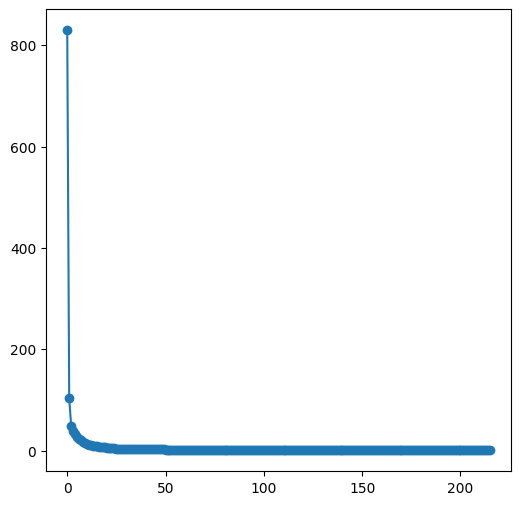

In [4]:
U, s, VT = np.linalg.svd(A, full_matrices = False) # perform SVD

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(s, 'o-')

(216, 1)
0.19798252634828717 1.0111224194205084
(4000, 1)
(4000, 1) (1, 1)
(1, 216)
(4000, 1) (1,) (1, 216)
(216, 5)
0.03224798124212823 1.0033205769121385
(4000, 5)
(4000, 5) (5, 5)
(5, 216)
(4000, 5) (5,) (5, 216)
(216, 10)
-0.023664400840740916 0.995273588162282
(4000, 10)
(4000, 10) (10, 10)
(10, 216)
(4000, 10) (10,) (10, 216)
(216, 50)
-0.006655395546238698 1.011379461526363
(4000, 50)
(4000, 50) (50, 50)
(50, 216)
(4000, 50) (50,) (50, 216)
(216, 100)
-0.009222651867835378 1.0063382207523086
(4000, 100)
(4000, 100) (100, 100)
(100, 216)
(4000, 100) (100,) (100, 216)


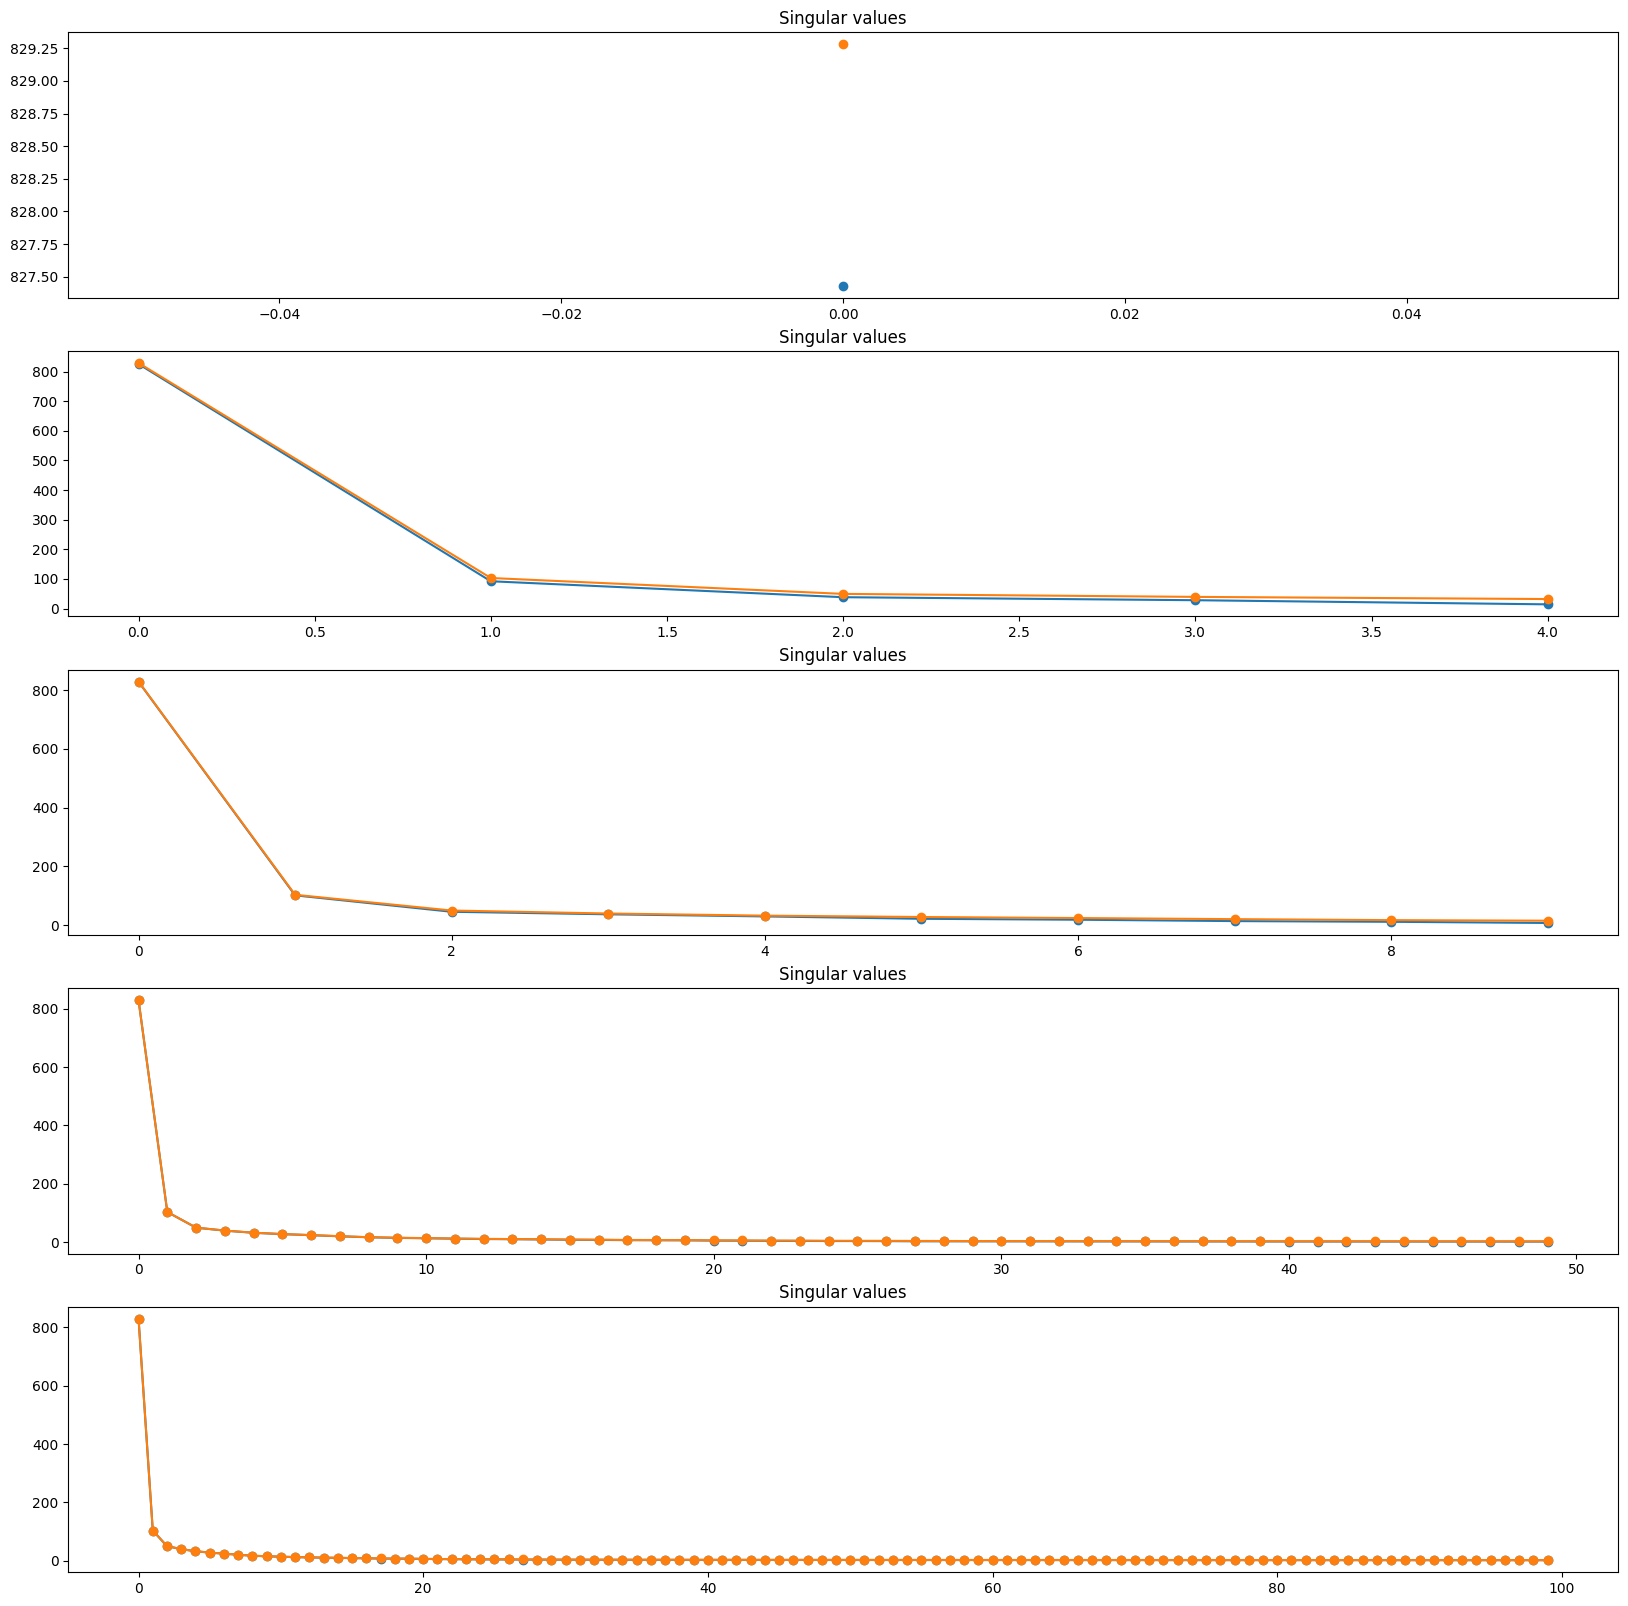

In [10]:
ranks = [1, 5, 10, 50, 100]

fig, ax = plt.subplots(5, 1, figsize=(20, 20))
ax.ravel()


for i,k in enumerate(ranks):
  U_k, s_k, VT_k = randomized_SVD_oversample(A, k, 1)
  ax[i].plot(s_k, 'o-')
  ax[i].plot(s[:k], 'o-')
  ax[i].set_title('Singular values')

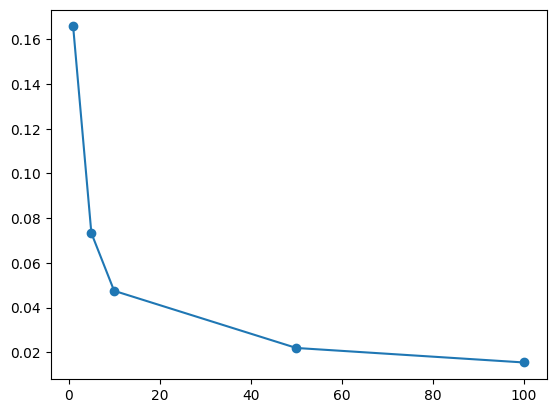

In [11]:
ranks = [1, 5, 10, 50, 100]

error_list = []

U, s, VT = np.linalg.svd(A, full_matrices = False) # perform SVD

for i,k in enumerate(ranks):
    A_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    error = np.linalg.norm(A - A_k) / np.linalg.norm(A)
    error_list.append(error)

plt.plot(ranks, error_list, 'o-')

(216, 1)
-0.085299937241634 0.9908650261489207
(4000, 1)
(4000, 1) (1, 1)
(1, 216)
(4000, 1) (1,) (1, 216)
(216, 7)
-0.014808337338038578 0.9869079748768289
(4000, 7)
(4000, 7) (7, 7)
(7, 216)
(4000, 7) (7,) (7, 216)
(216, 15)
-0.008208558132505886 1.017890146438665
(4000, 15)
(4000, 15) (15, 15)
(15, 216)
(4000, 15) (15,) (15, 216)
(216, 75)
0.001099203823565683 0.999469277369694
(4000, 75)
(4000, 75) (75, 75)
(75, 216)
(4000, 75) (75,) (75, 216)
(216, 150)
-0.00425200398365388 0.9991279973215546
(4000, 150)
(4000, 150) (150, 150)
(150, 216)
(4000, 150) (150,) (150, 216)


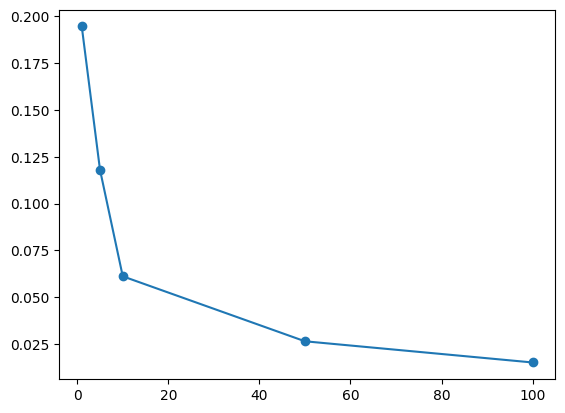

In [12]:
ranks = [1, 5, 10, 50, 100]

error_list = []

for i,k in enumerate(ranks):
    U_k, s_k, VT_k = randomized_SVD_oversample(A, k, 1.5)
    A_k = U_k @ np.diag(s_k) @ VT_k
    error = np.linalg.norm(A - A_k) / np.linalg.norm(A)
    error_list.append(error)

plt.plot(ranks, error_list, 'o-')

(216, 1)
-0.04263603506868665 0.9785272853373665
(4000, 1)
(4000, 1) (1, 1)
(1, 216)
(4000, 1) (1,) (1, 216)
(216, 5)
0.027737217613894426 0.9654344780902652
(4000, 5)
(4000, 5) (5, 5)
(5, 216)
(4000, 5) (5,) (5, 216)
(216, 10)
0.010727569552187642 0.9900691168647041
(4000, 10)
(4000, 10) (10, 10)
(10, 216)
(4000, 10) (10,) (10, 216)
(216, 50)
-0.024072294530712867 0.9984105119638875
(4000, 50)
(4000, 50) (50, 50)
(50, 216)
(4000, 50) (50,) (50, 216)
(216, 100)
0.009730231491752216 1.003658596889982
(4000, 100)
(4000, 100) (100, 100)
(100, 216)
(4000, 100) (100,) (100, 216)


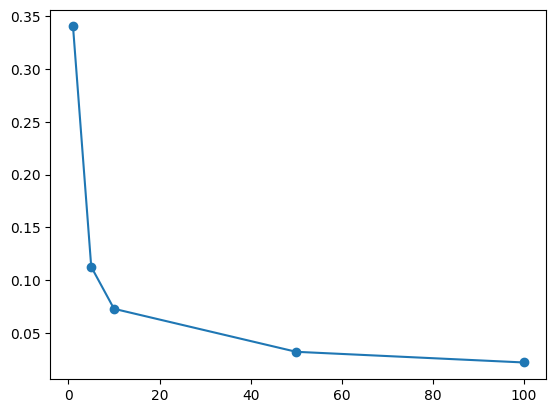

In [13]:
ranks = [1, 5, 10, 50, 100]

error_list = []

for i,k in enumerate(ranks):
    U_k, s_k, VT_k = randomized_SVD_oversample(A, k, 1)
    A_k = U_k @ np.diag(s_k) @ VT_k
    error = np.linalg.norm(A - A_k) / np.linalg.norm(A)
    error_list.append(error)

plt.plot(ranks, error_list, 'o-')

155 ms ± 5.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(216, 2)


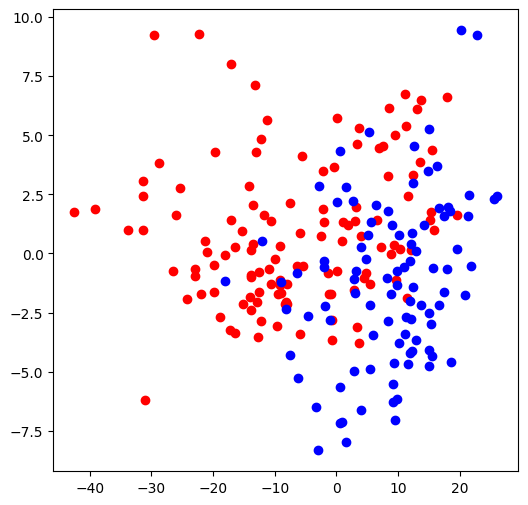

In [22]:
A_mean = np.mean(A, axis=1)
A_centered = A - A_mean[:, np.newaxis]

%timeit U, s, VT = np.linalg.svd(A_centered, full_matrices = False) # perform SVD 

Phi = A_centered.T @ U[:, :2]

print(Phi.shape)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(Phi[grp == 'Cancer', 0], Phi[grp == 'Cancer', 1], c='r', label='Cancer')
ax.scatter(Phi[grp == 'Normal', 0], Phi[grp == 'Normal', 1], c='b', label='Normal')

(216, 2)
-0.006974993428911926 0.9778166484859979
(4000, 2)
(4000, 2) (2, 2)
(2, 216)
(4000, 2) (2,) (2, 216)
(216, 2)
-0.06093058290319263 1.0392337187412908
(4000, 2)
(4000, 2) (2, 2)
(2, 216)
(4000, 2) (2,) (2, 216)
(216, 2)
0.06816254144951503 1.0468076651228644
(4000, 2)
(4000, 2) (2, 2)
(2, 216)
(4000, 2) (2,) (2, 216)
(216, 2)
-0.012084007022467256 0.9395465935035682
(4000, 2)
(4000, 2) (2, 2)
(2, 216)
(4000, 2) (2,) (2, 216)
(216, 2)
-0.0021320234478817536 0.9258875453207503
(4000, 2)
(4000, 2) (2, 2)
(2, 216)
(4000, 2) (2,) (2, 216)
(216, 2)
-0.025105260372627138 0.9887268961962331
(4000, 2)
(4000, 2) (2, 2)
(2, 216)
(4000, 2) (2,) (2, 216)
(216, 2)
-0.015164632056890937 1.017275366578372
(4000, 2)
(4000, 2) (2, 2)
(2, 216)
(4000, 2) (2,) (2, 216)
(216, 2)
-0.043675296835409036 0.9838240103778277
(4000, 2)
(4000, 2) (2, 2)
(2, 216)
(4000, 2) (2,) (2, 216)
(216, 2)
0.003556846492139243 0.9454079250339323
(4000, 2)
(4000, 2) (2, 2)
(2, 216)
(4000, 2) (2,) (2, 216)
(216, 2)
-0.07

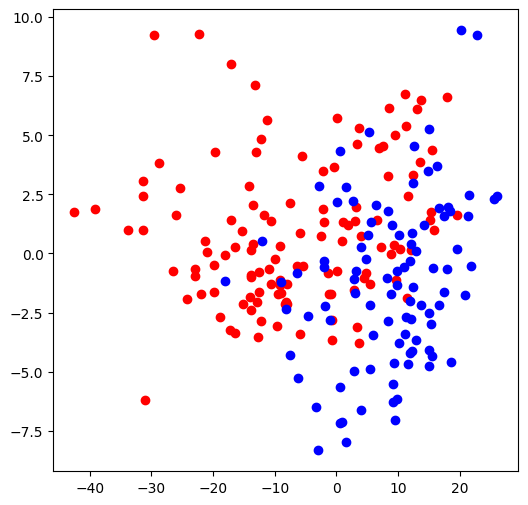

In [23]:
A_mean = np.mean(A, axis=1)
A_centered = A - A_mean[:, np.newaxis]

%timeit U, s, VT = randomized_SVD_oversample(A_centered, 2, 1) # perform RANDOMIZED SVD 

Phi = A_centered.T @ U[:, :2]

print(Phi.shape)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(Phi[grp == 'Cancer', 0], Phi[grp == 'Cancer', 1], c='r', label='Cancer')
ax.scatter(Phi[grp == 'Normal', 0], Phi[grp == 'Normal', 1], c='b', label='Normal')

## Exercise 02

In [ ]:
import jax
import jax.numpy as jnp

X = np.genfromtxt('X.dat') # Features
y = np.genfromtxt('y.dat') # Labels (+1, -1)

In [29]:
def L(s,y):
    # s is the score, y is the label
    return np.log(1 + np.exp(-s * y)) # Logistic loss

In [30]:
def loss(w, X, y):
    return jnp.mean(jnp.array([L(s, y) for i, s in enumerate(X @ w)]))

print(loss(np.array([1, 2]), np.array([[1, 2], [3, 4]]), np.array([1, -1])))

4.003366025025218


In [ ]:
# Data
n_training_points = X.shape[0]
# Training options
num_epochs = 5000
learning_rate_max = 0.1e-1
learning_rate_min = 2e-2
learning_rate_decay = 10000
learning_rate_constant = 0.5
batch_size = 1
########################################

loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums = 0)) # differentiate w.r.t. the first argument w

history = list()

w0 = np.array([0, 0])

w = w0
for epoch in range(num_epochs):
  #learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay)) # learning rate decay
  learning_rate = learning_rate_constant
  idxs = np.random.choice(n_training_points, batch_size)

  grads = grad_jit(w, X[idxs,:], y[idxs])
  w -= learning_rate * grads

  history.append(loss_jit(w, X, y))

print('loss: %1.3e' % history[-1])

In [ ]:
# Data
n_training_points = X.shape[0]
# Training options
num_epochs = 5000
learning_rate_max = 0.5e-2
learning_rate_min = 2e-2
learning_rate_decay = 100
learning_rate_constant = 0.5
batch_size = 1
########################################

loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums = 0)) # differentiate w.r.t. the first argument w

history = list()

w0 = np.array([0, 0])

w = w0
for epoch in range(num_epochs):
  learning_rate = learning_rate_max * (1 - epoch/learning_rate_decay) # learning rate decay
#   learning_rate = learning_rate_constant
  idxs = np.random.choice(n_training_points, batch_size)

  grads = grad_jit(w, X[idxs,:], y[idxs])
  w -= learning_rate * grads

  history.append(loss_jit(w, X, y))

print('loss: %1.3e' % history[-1])